<center><font size="10"> 🔥Recurrent Neural Networks🔥 </font></center>

### Basic RNN

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Lets Create a basic random time series with 2 waves and some noise

In [12]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [13]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

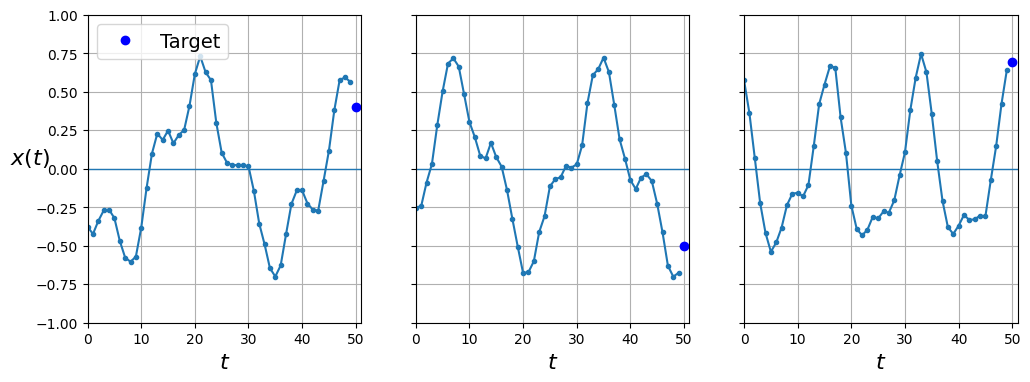

In [14]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

In [8]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.14122659

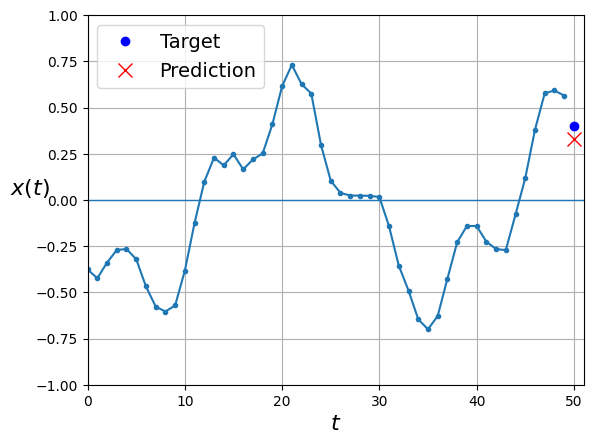

In [15]:
plot_series(X_valid[0,:,0], y_valid[0,0], y_pred[0, 0])
plt.show()

In [17]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [50, 1]),
        keras.layers.Dense(1)
        ])


model.compile(loss='mse', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 6ms/step - loss: 0.1391 - val_loss: 0.0771
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0452 - val_loss: 0.0319
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0227 - val_loss: 0.0185
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0151 - val_loss: 0.0135
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 10/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0065 - val_loss: 0.0063

In [18]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0042


0.004179720766842365

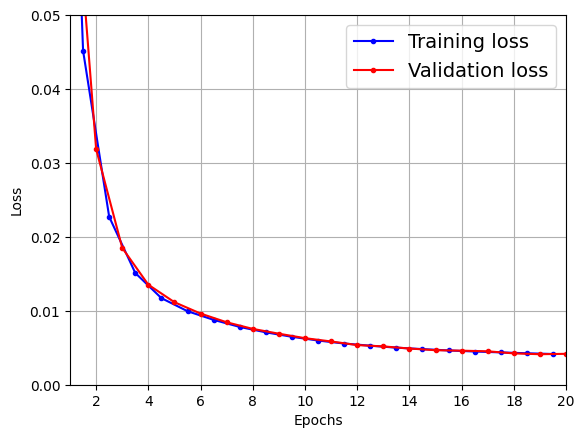

In [19]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 0s 2ms/step


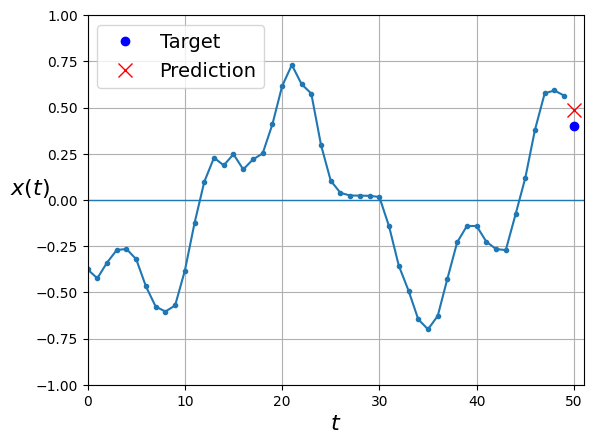

In [20]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0,0], y_pred[0,0])
plt.show()

### Simple RNN

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None, 1])
])
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mse', optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 19s 85ms/step - loss: 0.0948 - val_loss: 0.0424
Epoch 2/20
219/219 [==============================] - 18s 80ms/step - loss: 0.0207 - val_loss: 0.0135
Epoch 3/20
219/219 [==============================] - 18s 82ms/step - loss: 0.0131 - val_loss: 0.0123
Epoch 4/20
219/219 [==============================] - 18s 84ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 19s 86ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 6/20
219/219 [==============================] - 19s 88ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 7/20
219/219 [==============================] - 20s 89ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 8/20
219/219 [==============================] - 19s 87ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 9/20
219/219 [==============================] - 19s 88ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 20s 89ms/step - loss: 0.011

In [22]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 1s 16ms/step - loss: 0.0109


0.010900323279201984

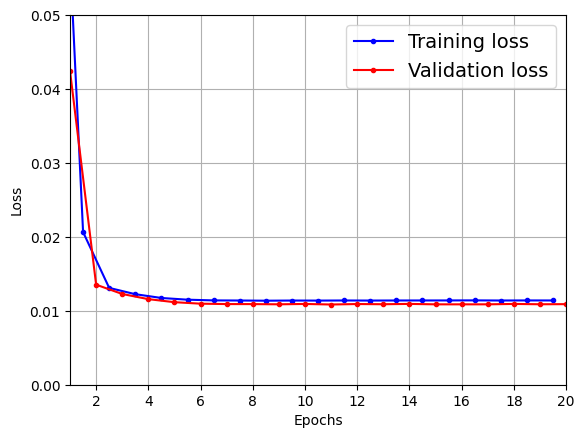

In [24]:
plot_learning_curves(history.history['loss'], history.history['val_loss'])
plt.show()

63/63 [==============================] - 1s 14ms/step


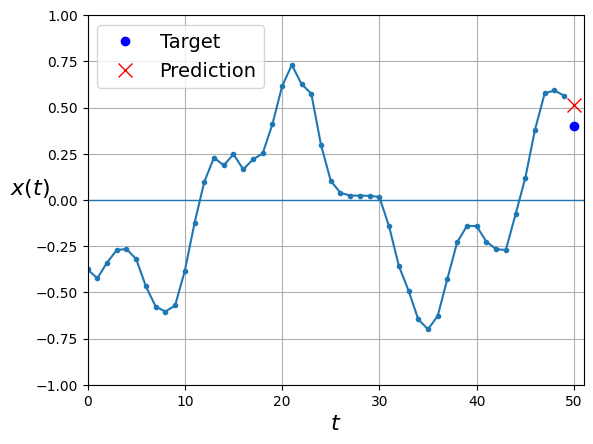

In [26]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0,0], y_pred[0, 0])
plt.show()

### Deep RNN

In [29]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
        keras.layers.SimpleRNN(20, return_sequences = True),
        keras.layers.SimpleRNN(1)
])

model.compile(loss='mse', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 71s 319ms/step - loss: 0.0326 - val_loss: 0.0061
Epoch 2/20
219/219 [==============================] - 67s 306ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 3/20
219/219 [==============================] - 69s 317ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 4/20
219/219 [==============================] - 70s 321ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 5/20
219/219 [==============================] - 72s 329ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 6/20
219/219 [==============================] - 70s 321ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/20
219/219 [==============================] - 72s 330ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/20
219/219 [==============================] - 69s 317ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 9/20
219/219 [==============================] - 70s 319ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/20
219/219 [==============================] - 70s 322ms/step - l

In [30]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 2s 37ms/step - loss: 0.0026


0.002581776585429907

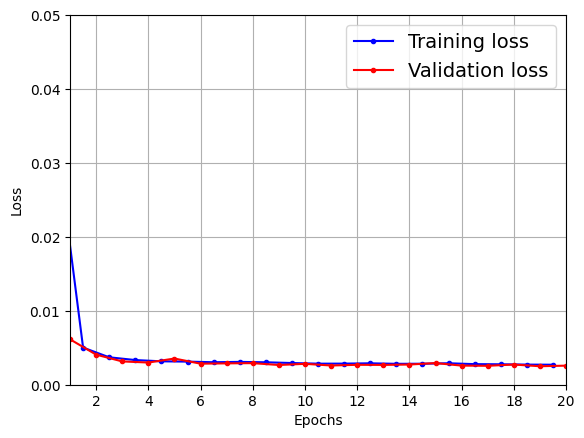

In [31]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 3s 39ms/step


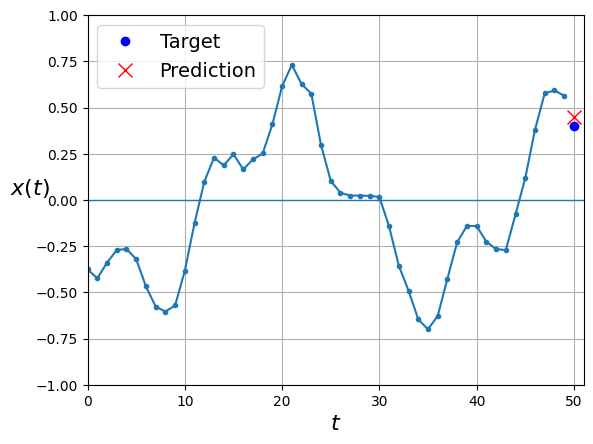

In [33]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :,0], y_valid[0,0], y_pred[0,0])
plt.show()

In [35]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 47s 211ms/step - loss: 0.0390 - val_loss: 0.0048
Epoch 2/20
219/219 [==============================] - 46s 208ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 46s 212ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 4/20
219/219 [==============================] - 45s 205ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/20
219/219 [==============================] - 47s 213ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/20
219/219 [==============================] - 46s 211ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 47s 213ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/20
219/219 [==============================] - 46s 209ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/20
219/219 [==============================] - 46s 210ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 47s 217ms/step - l

In [36]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 2s 27ms/step - loss: 0.0027


0.0026619217824190855

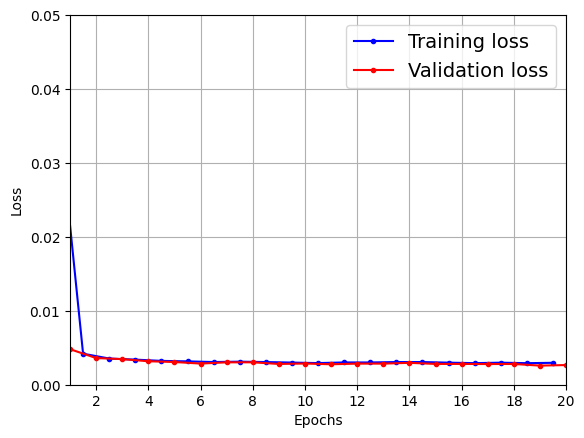

In [37]:
plot_learning_curves(history.history['loss'], history.history['val_loss'])
plt.show()

63/63 [==============================] - 2s 27ms/step


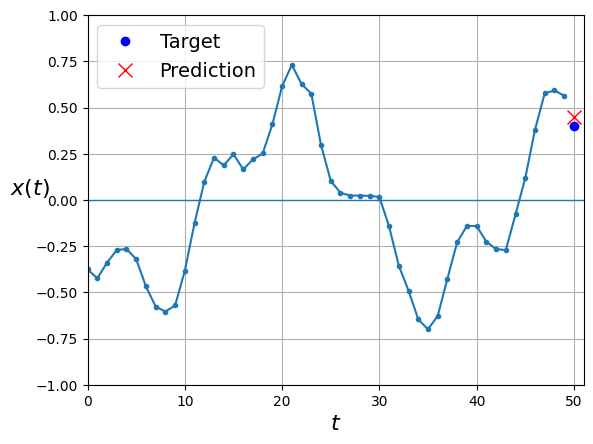

In [38]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0,0], y_pred[0,0])
plt.show()

#### To predict several step ahead

In [43]:
series = generate_time_series(1, n_steps + 10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
Y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 34ms/step


In [44]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

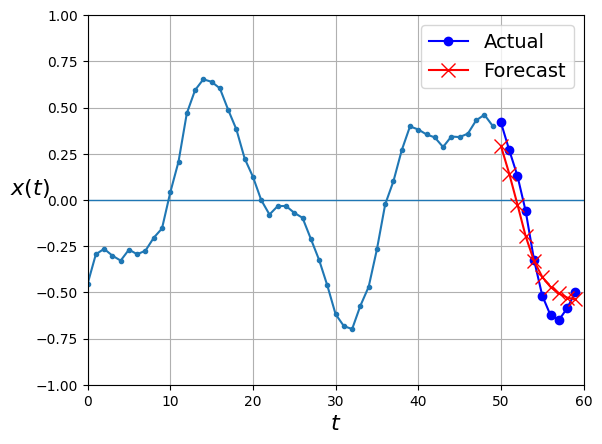

In [45]:
plot_multiple_forecasts(X_new, y_new, Y_pred)
plt.show()

#### Lets predict the next 10 values

In [46]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences = True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer = 'adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 46s 206ms/step - loss: 0.0517 - val_loss: 0.0085
Epoch 2/20
219/219 [==============================] - 45s 204ms/step - loss: 0.0063 - val_loss: 0.0049
Epoch 3/20
219/219 [==============================] - 47s 214ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 4/20
219/219 [==============================] - 45s 207ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/20
219/219 [==============================] - 46s 210ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 6/20
219/219 [==============================] - 45s 205ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 7/20
219/219 [==============================] - 46s 211ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 8/20
219/219 [==============================] - 46s 209ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 9/20
219/219 [==============================] - 45s 204ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 10/20
219/219 [==============================] - 45s 206ms/step - l

In [47]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 2s 27ms/step - loss: 0.0027


0.002748331520706415

In [48]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

1/1 [==============================] - 0s 206ms/step


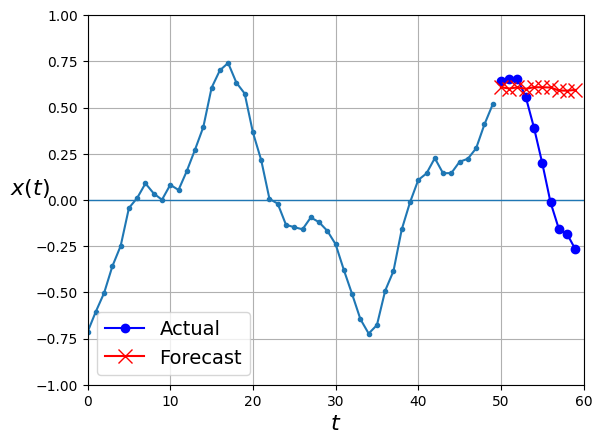

In [49]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [50]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
        keras.layers.SimpleRNN(20, return_sequences = True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
])


def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [53]:
model.compile(loss='mse', optimizer = keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 48s 213ms/step - loss: 0.0474 - last_time_step_mse: 0.0361 - val_loss: 0.0377 - val_last_time_step_mse: 0.0237
Epoch 2/20
219/219 [==============================] - 48s 220ms/step - loss: 0.0381 - last_time_step_mse: 0.0260 - val_loss: 0.0331 - val_last_time_step_mse: 0.0200
Epoch 3/20
219/219 [==============================] - 49s 225ms/step - loss: 0.0320 - last_time_step_mse: 0.0192 - val_loss: 0.0336 - val_last_time_step_mse: 0.0229
Epoch 4/20
219/219 [==============================] - 48s 221ms/step - loss: 0.0290 - last_time_step_mse: 0.0165 - val_loss: 0.0264 - val_last_time_step_mse: 0.0139
Epoch 5/20
219/219 [==============================] - 46s 209ms/step - loss: 0.0260 - last_time_step_mse: 0.0139 - val_loss: 0.0254 - val_last_time_step_mse: 0.0133
Epoch 6/20
219/219 [==============================] - 45s 206ms/step - loss: 0.0231 - last_time_step_mse: 0.0106 - val_loss: 0.0226 - val_last_time_step_mse: 0.0114
Epoch 7/20

In [54]:
from tensorflow.keras.layers import LayerNormalization

In [57]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [60]:

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                        input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_valid, Y_valid))

Epoch 1/10
219/219 [==============================] - 111s 495ms/step - loss: 0.1269 - last_time_step_mse: 0.1052 - val_loss: 0.0648 - val_last_time_step_mse: 0.0493
Epoch 2/10
219/219 [==============================] - 108s 492ms/step - loss: 0.0595 - last_time_step_mse: 0.0462 - val_loss: 0.0552 - val_last_time_step_mse: 0.0418
Epoch 3/10
219/219 [==============================] - 109s 496ms/step - loss: 0.0522 - last_time_step_mse: 0.0377 - val_loss: 0.0494 - val_last_time_step_mse: 0.0347
Epoch 4/10
219/219 [==============================] - 109s 495ms/step - loss: 0.0474 - last_time_step_mse: 0.0319 - val_loss: 0.0442 - val_last_time_step_mse: 0.0282
Epoch 5/10
219/219 [==============================] - 108s 494ms/step - loss: 0.0417 - last_time_step_mse: 0.0258 - val_loss: 0.0398 - val_last_time_step_mse: 0.0227
Epoch 6/10
219/219 [==============================] - 109s 498ms/step - loss: 0.0375 - last_time_step_mse: 0.0214 - val_loss: 0.0355 - val_last_time_step_mse: 0.0205
Epoc

## LSTM

In [61]:
model = keras.models.Sequential([
        keras.layers.LSTM(20, return_sequences = True, input_shape=[None, 1]),
        keras.layers.LSTM(20, return_sequences = True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [62]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_valid, Y_valid))

Epoch 1/10
219/219 [==============================] - 6s 15ms/step - loss: 0.0784 - last_time_step_mse: 0.0643 - val_loss: 0.0569 - val_last_time_step_mse: 0.0401
Epoch 2/10
219/219 [==============================] - 3s 11ms/step - loss: 0.0507 - last_time_step_mse: 0.0325 - val_loss: 0.0447 - val_last_time_step_mse: 0.0245
Epoch 3/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0403 - last_time_step_mse: 0.0207 - val_loss: 0.0368 - val_last_time_step_mse: 0.0167
Epoch 4/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0347 - last_time_step_mse: 0.0158 - val_loss: 0.0329 - val_last_time_step_mse: 0.0136
Epoch 5/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0319 - last_time_step_mse: 0.0137 - val_loss: 0.0314 - val_last_time_step_mse: 0.0136
Epoch 6/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0305 - last_time_step_mse: 0.0132 - val_loss: 0.0299 - val_last_time_step_mse: 0.0128
Epoch 7/10
219/219 [==

## Conv1D

In [63]:
model = keras.models.Sequential([
        keras.layers.Conv1D(filters = 20, kernel_size = 4, strides = 2, padding="valid", input_shape = [None, 1]),
        keras.layers.GRU(20, return_sequences = True),
        keras.layers.GRU(20, return_sequences = True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
                        ])

model.compile(loss="mse", optimizer='adam', metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 11s 22ms/step - loss: 0.0701 - last_time_step_mse: 0.0621 - val_loss: 0.0488 - val_last_time_step_mse: 0.0404
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0411 - last_time_step_mse: 0.0337 - val_loss: 0.0352 - val_last_time_step_mse: 0.0281
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0317 - last_time_step_mse: 0.0235 - val_loss: 0.0288 - val_last_time_step_mse: 0.0196
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0271 - last_time_step_mse: 0.0172 - val_loss: 0.0263 - val_last_time_step_mse: 0.0167
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0248 - last_time_step_mse: 0.0142 - val_loss: 0.0247 - val_last_time_step_mse: 0.0143
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0235 - last_time_step_mse: 0.0127 - val_loss: 0.0230 - val_last_time_step_mse: 0.0119
Epoch 7/20
219/219 [=